In [ ]:
!kaggle datasets download -d nikbearbrown/tmnist-alphabet-94-characters

Dataset URL: https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters
License(s): Attribution 3.0 Unported (CC BY 3.0)
 98% 83.0M/84.7M [00:05<00:00, 22.1MB/s]
100% 84.7M/84.7M [00:05<00:00, 15.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/tmnist-alphabet-94-characters.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import tensorflow as tf

# Fetch the dataset directly using TensorFlow
df = '/content/94_character_TMNIST.csv'
df = pd.read_csv(df)
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
class_labels = ['H','e','l','o',',','W','r','d','!']

df = df[df['labels'].isin(class_labels)]

In [ ]:
category_counts = df['labels'].value_counts()

category_counts.shape

(9,)

In [ ]:
print(f"The Shape of the Dataframe is: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of unique character present in the Dataset: {len(df.labels.unique())}")

The Shape of the Dataframe is: (26091, 786)
Number of Samples: 26091
Number of unique character present in the Dataset: 9


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def plot_figs(X, y):
    plt.figure(figsize=(10, 8))
    for i in range(10):
      plt.subplot(3,5,i+1)
      plt.title(y.iloc[i])
      plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.show()

ValueError: cannot reshape array of size 784 into shape (32,32)

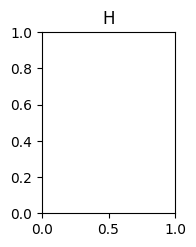

In [ ]:
import re
y = df["labels"]
X = df.drop(["names", "labels"], axis = 1)

plot_figs(X, y)

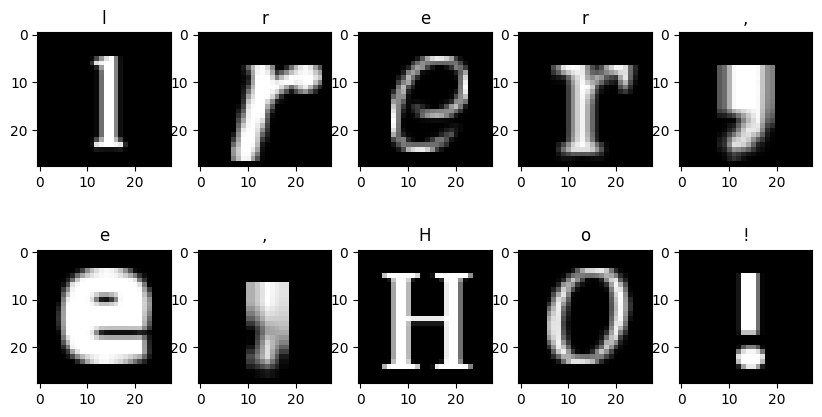

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
plot_figs(X_train, y_train)

In [ ]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Reshape, Conv2D, MaxPooling2D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import load_img, img_to_array


In [ ]:
enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(y_test.values.reshape(-1,1))
# Sum up occurrences of each class in the encoded arrays
y_train_sum = y_train_encoded.sum(axis=0)
y_test_sum = y_test_encoded.sum(axis=0)

X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [ ]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

no_of_classes=df['labels'].nunique()


#since each pixel is a number between 0-1 we will first start with basic Neural Network
model = Sequential([
    Reshape((28,28,1), input_shape=(28,28)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(no_of_classes, activation='softmax')
])


opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

ValueError: cannot reshape array of size 16363648 into shape (20872,64,64)

In [ ]:
#fitting the model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=1,batch_size=128)

Epoch 1/20
164/164 [==============================] - 13s 26ms/step - loss: 0.7262 - accuracy: 0.7548 - val_loss: 6.7672 - val_accuracy: 0.1090
Epoch 2/20
164/164 [==============================] - 3s 20ms/step - loss: 0.1913 - accuracy: 0.9432 - val_loss: 7.5473 - val_accuracy: 0.1090
Epoch 3/20
164/164 [==============================] - 3s 16ms/step - loss: 0.1303 - accuracy: 0.9606 - val_loss: 1.5378 - val_accuracy: 0.6561
Epoch 4/20
164/164 [==============================] - 2s 15ms/step - loss: 0.0876 - accuracy: 0.9745 - val_loss: 0.1678 - val_accuracy: 0.9571
Epoch 5/20
164/164 [==============================] - 3s 16ms/step - loss: 0.0734 - accuracy: 0.9788 - val_loss: 0.0527 - val_accuracy: 0.9851
Epoch 6/20
164/164 [==============================] - 3s 16ms/step - loss: 0.0601 - accuracy: 0.9835 - val_loss: 0.0482 - val_accuracy: 0.9845
Epoch 7/20
164/164 [==============================] - 3s 20ms/step - loss: 0.0517 - accuracy: 0.9845 - val_loss: 0.0485 - val_accuracy: 0.986

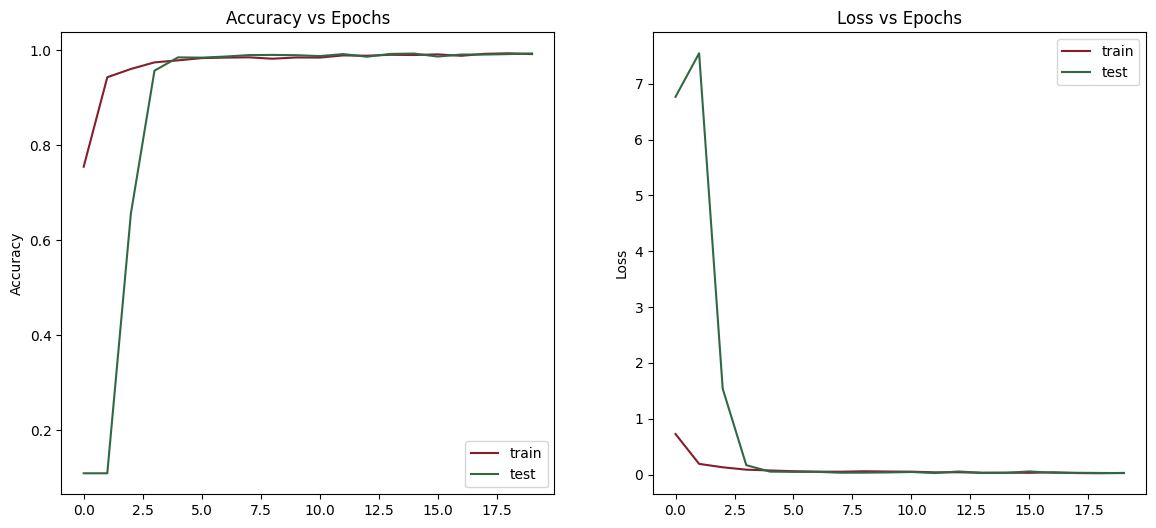

In [ ]:
import numpy as np
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [ ]:
class StringNumberMap:
    def __init__(self):
        self.string_to_number = {}
        self.number_to_string = {}
        self.next_number = 0

    def add_string(self, string):
        if string not in self.string_to_number:
            self.string_to_number[string] = self.next_number
            self.number_to_string[self.next_number] = string
            self.next_number += 1

    def get_number(self, string):
        if string in self.string_to_number:
            return self.string_to_number[string]
        else:
            return None

    def get_string(self, number):
        if number in self.number_to_string:
            return self.number_to_string[number]
        else:
            return None

In [ ]:
import os
import csv
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Set the directory path
dir_path = '/content/Data'

map=StringNumberMap()
# Define a function to convert image name to image ID
def name_to_id(name):
    return name.split('.')[0]
# Create a CSV file
with open('image_list.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Image Path', 'Image Name','Image Id'])

    # Iterate through the directory
    for filename in os.listdir(dir_path):
        # Check if the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            # Get the image path and name
            image_path = os.path.join(dir_path, filename)
            image_name = os.path.basename(filename).split(' ')[0]
            map.add_string(image_name)
            # Get the image ID
            image_id = map.get_number(image_name)
            # Write the row to the CSV file
            writer.writerow([image_path, image_name,image_id])

In [ ]:
df1='/content/image_list.csv'
df1 = pd.read_csv(df1)
df1.head()

,Image Path,Image Name,Image Id
0,/content/Data/Patau_One 1.png,Patau_One,0
1,/content/Data/Open_Sans 3.png,Open_Sans,1
2,/content/Data/Open_Sans 2.png,Open_Sans,1
3,/content/Data/Noto_Sans 3.png,Noto_Sans,2
4,/content/Data/Fredoka_One 4.png,Fredoka_One,3


In [ ]:
# Preprocess the images
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(28, 200))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

In [ ]:
df1['img_array'] = df1['Image Path'].apply(preprocess_image)

# Prepare the data for the model
X1 = np.stack(df1['img_array'].values)
y1 = df1['Image Id'].values

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
X1_test[0].shape

(28, 200, 3)

In [ ]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 200, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(11, activation='softmax')
])
opt = Adam(learning_rate=0.001)
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 198, 32)       896       
                                                                 
 batch_normalization_6 (Bat  (None, 26, 198, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 99, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 99, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 99, 128)       36992     
                                                                 
 batch_normalization_7 (Bat  (None, 13, 99, 128)      

In [ ]:
df1['img_array'] = df1['Image Path'].apply(preprocess_image)

# Prepare the data for the model
X1 = np.stack(df1['img_array'].values)
y1 = df1['Image Id'].values

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_2.fit(X1_train, y1_train, epochs=100, validation_data=(X1_test, y1_test))

# Evaluate the model
loss, accuracy = model_2.evaluate(X1_test, y1_test)
print(f"Test Accuracy: {accuracy}")

Epoch 1/100
2/2 [==============================] - 4s 366ms/step - loss: 0.7534 - accuracy: 0.7568 - val_loss: 60.8246 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 69ms/step - loss: 0.8257 - accuracy: 0.7838 - val_loss: 58.4344 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 73ms/step - loss: 0.6299 - accuracy: 0.7297 - val_loss: 57.0348 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 0.7222 - accuracy: 0.8378 - val_loss: 55.1967 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 68ms/step - loss: 0.6301 - accuracy: 0.8649 - val_loss: 54.2426 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 68ms/step - loss: 0.8076 - accuracy: 0.7838 - val_loss: 54.3197 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 71ms/step - loss: 0.7237 - accuracy: 0.8378 - val_loss: 54.5207 - val_accur

In [ ]:
def resize_image_array(img_array):
    """
    Resize a 2D image array to (1, 28, 28) shape.

    Args:
        img_array: 2D image array of any shape

    Returns:
        Resized image array of shape (1, 28, 28)
    """
    # Convert the image array to grayscale
    gray_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY) if len(img_array.shape) == 3 else img_array

    # Resize the image to 28x28 using OpenCV
    resized_img = cv2.resize(gray_img, (28, 28))

    # Add a batch dimension (1) to the beginning
    resized_img = resized_img.reshape((1, 28, 28))

    return resized_img

In [ ]:
def image_chunks(path):
  # Load the image from Google Drive
  img = cv2.imread(path)
  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Threshold the image to segment out black features
  _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # Find contours in the thresholded image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a list to store the bounding box coordinates
  boxes = []

  # Iterate through the contours and draw a bounding box around each one
  for contour in contours:
      rect = cv2.minAreaRect(contour)
      box = cv2.boxPoints(rect)
      box = np.int0(box)
      cv2.drawContours(img, [box], 0, (0, 255, 0), 2)
      x, y, w, h = cv2.boundingRect(box)
      boxes.append((x, y, x+w, y+h))


  # Display the output
  cv2_imshow(img)

  H_corrdinate=[]
  d_corrdinate=[]

  for i, box in enumerate(boxes):
      x, y, w, h = box
      cropped_img = img[y:h, x:w]
      cv2_imshow(cropped_img)
      # Convert the cropped image to a NumPy array
      cropped_img_array = np.array(cropped_img)
      gray_img = resize_image_array(cropped_img_array)
      gray_img=~gray_img
      index=model.predict(gray_img)
      letter = class_labels[np.argmax(index)]
      if letter[0] == "H":
        H_corrdinate.append((x,y,w,h))
      elif letter[0] == "d":
        d_corrdinate.append((x,y,w,h))
      print(letter)

  crp_corrdinate=[]
  for i in H_corrdinate:
    x, y, w, h = i
    for j in d_corrdinate:
      x1, y1, w1, h1 = j
      if h == h1:
        crp_corrdinate.append((x,y,w1,h1))
        break

  img_1 = cv2.imread(path)
  cropped_img=[]

  for box in crp_corrdinate:
      x, y, w, h = box
      cropped_img.append(img_1[y:h, x:w])

  return img, crp_corrdinate

<ipython-input-78-7338fe524ce9>:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


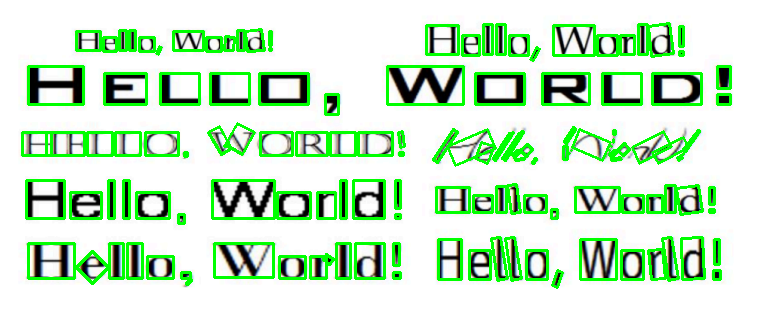

1/1 [==============================] - 0s 36ms/step
o


1/1 [==============================] - 0s 32ms/step
o


1/1 [==============================] - 0s 28ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 21ms/step
o


1/1 [==============================] - 0s 22ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 19ms/step
o


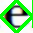

1/1 [==============================] - 0s 24ms/step
W


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
l


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 17ms/step
l


1/1 [==============================] - 0s 17ms/step
o


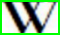

1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 22ms/step
o


1/1 [==============================] - 0s 22ms/step
o


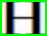

1/1 [==============================] - 0s 22ms/step
l


1/1 [==============================] - 0s 17ms/step
o


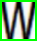

1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 19ms/step
l


1/1 [==============================] - 0s 21ms/step
,


1/1 [==============================] - 0s 20ms/step
r


1/1 [==============================] - 0s 17ms/step
r


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 24ms/step
o


1/1 [==============================] - 0s 25ms/step
o


1/1 [==============================] - 0s 21ms/step
o


1/1 [==============================] - 0s 20ms/step
o


1/1 [==============================] - 0s 21ms/step
,


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 20ms/step
o


1/1 [==============================] - 0s 18ms/step
l


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 18ms/step
l


1/1 [==============================] - 0s 25ms/step
,


1/1 [==============================] - 0s 23ms/step
o


1/1 [==============================] - 0s 22ms/step
o


1/1 [==============================] - 0s 45ms/step
r


1/1 [==============================] - 0s 21ms/step
o


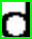

1/1 [==============================] - 0s 21ms/step
,


1/1 [==============================] - 0s 17ms/step
o


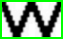

1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 19ms/step
o


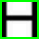

1/1 [==============================] - 0s 19ms/step
l


1/1 [==============================] - 0s 20ms/step
o


1/1 [==============================] - 0s 24ms/step
o


1/1 [==============================] - 0s 23ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 23ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 22ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 22ms/step
o


1/1 [==============================] - 0s 22ms/step
o


1/1 [==============================] - 0s 18ms/step
H


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 20ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 18ms/step
o


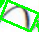

1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
r


1/1 [==============================] - 0s 18ms/step
o


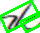

1/1 [==============================] - 0s 17ms/step
l


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 23ms/step
o


1/1 [==============================] - 0s 24ms/step
r


1/1 [==============================] - 0s 23ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 26ms/step
l


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 24ms/step
l


1/1 [==============================] - 0s 27ms/step
o


1/1 [==============================] - 0s 19ms/step
o


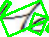

1/1 [==============================] - 0s 18ms/step
l


1/1 [==============================] - 0s 19ms/step
r


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 19ms/step
o


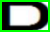

1/1 [==============================] - 0s 19ms/step
o


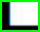

1/1 [==============================] - 0s 18ms/step
o


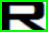

1/1 [==============================] - 0s 18ms/step
o


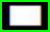

1/1 [==============================] - 0s 17ms/step
r


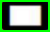

1/1 [==============================] - 0s 18ms/step
H


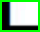

1/1 [==============================] - 0s 21ms/step
o


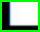

1/1 [==============================] - 0s 27ms/step
o


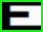

1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 18ms/step
o


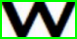

1/1 [==============================] - 0s 17ms/step
o


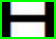

1/1 [==============================] - 0s 27ms/step
l


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 22ms/step
o


1/1 [==============================] - 0s 24ms/step
l


1/1 [==============================] - 0s 24ms/step
o


1/1 [==============================] - 0s 19ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 18ms/step
l


1/1 [==============================] - 0s 27ms/step
o


1/1 [==============================] - 0s 17ms/step
o


1/1 [==============================] - 0s 17ms/step
l


1/1 [==============================] - 0s 17ms/step
,


1/1 [==============================] - 0s 26ms/step
o


1/1 [==============================] - 0s 28ms/step
o


1/1 [==============================] - 0s 32ms/step
o


1/1 [==============================] - 0s 42ms/step
o


1/1 [==============================] - 0s 33ms/step
o


1/1 [==============================] - 0s 27ms/step
l


1/1 [==============================] - 0s 27ms/step
,


1/1 [==============================] - 0s 33ms/step
o


1/1 [==============================] - 0s 28ms/step
r


1/1 [==============================] - 0s 34ms/step
r


In [ ]:
path='/content/Screenshot 2024-07-14 141746.png'
bounded,crp_corrdinate = image_chunks(path)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
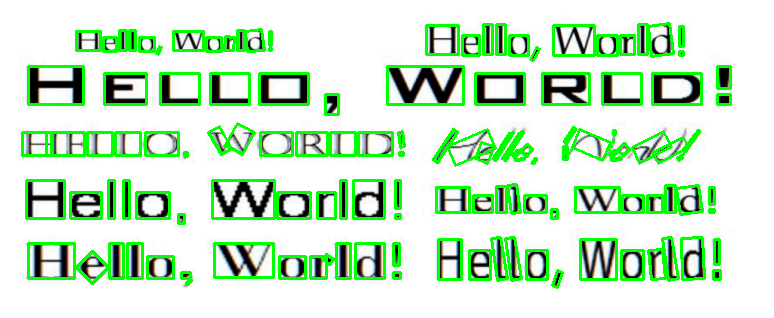

In [ ]:
bounded

In [ ]:
crp_corrdinate[0]

IndexError: list index out of range

In [ ]:
def resize_image(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to (200, 28)
    resized_image = cv2.resize(image, (200, 28))

    # Add a channel dimension (since OpenCV reads images in BGR format)
    resized_image = resized_image[..., np.newaxis]

    # Convert to RGB format (since most deep learning models expect RGB)
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Add a batch dimension
    resized_image = np.expand_dims(resized_image, axis=0)

    # Return the resized image
    return resized_image

In [ ]:
img=cv2.imread(path)
for box in crp_corrdinate:
  x,y,h,w=box
  print("Co-ordinates",f"{({x},{y}),({h},{w})}")
  image=img[y:h, x:w]
  print("Image",image)
  prediction = model_2.predict(input_data)
  print("Confidence", prediction)
  prediction=np.argmax(prediction)+1
  print("Predicted",map.get_string(prediction))